In [1]:
import xml.etree.ElementTree as ET

# List of names for bus stops
bus_stop_names = ["Bengal Chemical", "Bidhannagar Road", "Central Park","Karunamoyee","City Centre","Salt Lake Sector V","Stadium","Tank No 4","Chingrighata"]  
# Dictionary to track the count of polygons for each bus stop
bus_stop_count = {name: 0 for name in bus_stop_names}

# Parsing the input XML file
def create_individual_xml(input_file):
    tree = ET.parse(input_file)
    root = tree.getroot()

    # Iterating over all 'poly' elements to identify bus stop polygons
    for poly in root.findall("poly"):
        name = poly.attrib.get("name", "")

        # Checking if the type is "building.yes" and name matches one of the bus stop names
        for region in bus_stop_names:
            if poly.attrib.get("type") == "building.yes" and name == region:
                
                # Incrementing the count for the specific bus stop
                bus_stop_count[region] += 1

                # Creating a new XML structure for each bus stop
                bus_stop_root = ET.Element("root")  
                bus_stop_root.append(poly)  

                # Creating an ElementTree from the new root and write it to a file
                bus_stop_tree = ET.ElementTree(bus_stop_root)
                bus_stop_filename = f"{region}.xml"  # Creating filename using custom name

                # Writing to the XML file
                with open(bus_stop_filename, "ab") as xml_file:
                    bus_stop_tree.write(xml_file)

# Input XML file path
input_file = "voronoiPolygonRegion.xml" 

# Calling the function to generate individual XML files
create_individual_xml(input_file)


In [2]:
import csv

# Output CSV file path
csv_file = "BusStopStatistics.csv"

# Writing data to CSV
def write_bus_stop_statistics_to_csv(bus_stop_count, csv_file):
    with open(csv_file, mode="w", newline="") as file:
        writer = csv.writer(file)

        # Writing the header
        writer.writerow(["Bus_Stop Name", "Number of Buildings", "Estimated Number of People"])

        # Writing the data for each bus stop based on the count of buildings
        for bus_stop, count in bus_stop_count.items():
            estimated_people = count * 240  # Estimated people = Number of Buildings * 240
            writer.writerow([bus_stop, count, estimated_people])

# Calling the function to write to the CSV file
write_bus_stop_statistics_to_csv(bus_stop_count, csv_file)

print(f"Bus stop statistics have been written to {csv_file}")


Bus stop statistics have been written to BusStopStatistics.csv


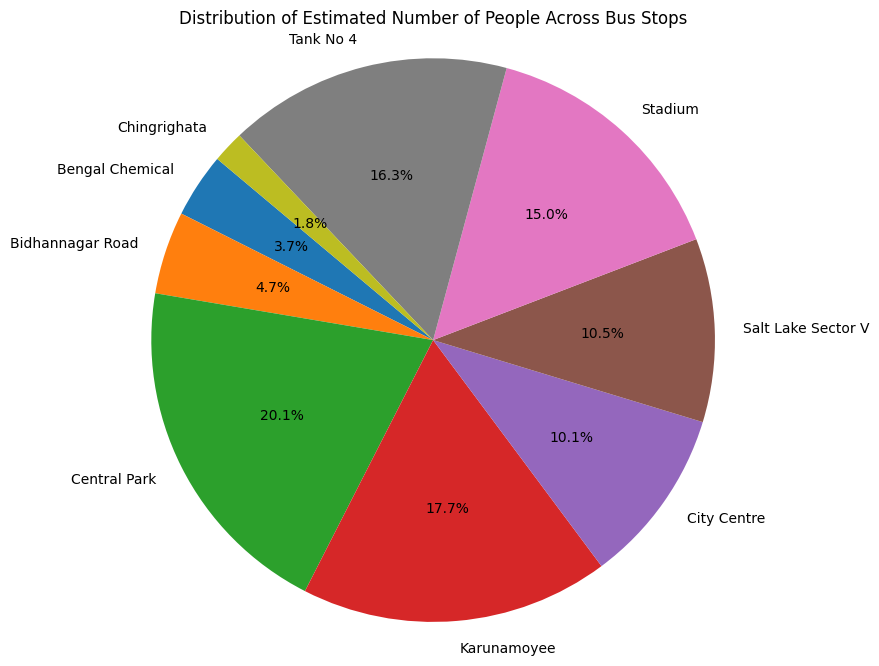

In [3]:
import matplotlib.pyplot as plt

# Reading data from the CSV file
def read_bus_stop_statistics(csv_file):
    bus_stops = []
    estimated_people = []

    with open(csv_file, mode="r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header

        for row in reader:
            bus_stops.append(row[0])  # Bus stop name
            estimated_people.append(int(row[2]))  # Estimated number of people

    return bus_stops, estimated_people

# Generate pie chart
def create_pie_chart(bus_stops, estimated_people):
    plt.figure(figsize=(8, 8))
    plt.pie(estimated_people, labels=bus_stops, autopct="%1.1f%%", startangle=140)
    plt.title("Distribution of Estimated Number of People Across Bus Stops")
    plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular
    plt.show()

# Reading the data from CSV file
bus_stops, estimated_people = read_bus_stop_statistics(csv_file)

# Creating the pie chart
create_pie_chart(bus_stops, estimated_people)